# **Decision Tree Classifier on the Iris Dataset**

The Iris Dataset includes three iris species with 50 samples each as well as some properties about each flower.

The columns in this dataset are:
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)
5. species - setosa (0), versicolor (1), virginica (2)



**Importing libraries:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

**Loading the data:**

In [2]:
iris = load_iris()

**Features and Target Variable:**

In [3]:
X = iris.data # features
y = iris.target # target variable

**Train-Test Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**About Decision Trees:**

A **decision tree classifier** is a flowchart-like model used for classification, where each node represents a decision based on a feature, and branches show possible outcomes. The algorithm splits the data at each node based on the feature that best separates the classes. This process continues until the data is fully divided into groups that belong to a single class. To predict, the tree is followed from the root to a leaf node, where the class label is assigned. Decision trees are easy to understand and interpret but can become complex if overgrown.

**Building & Fitting the Decision Tree:**

In [5]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Plotting the decision tree:**

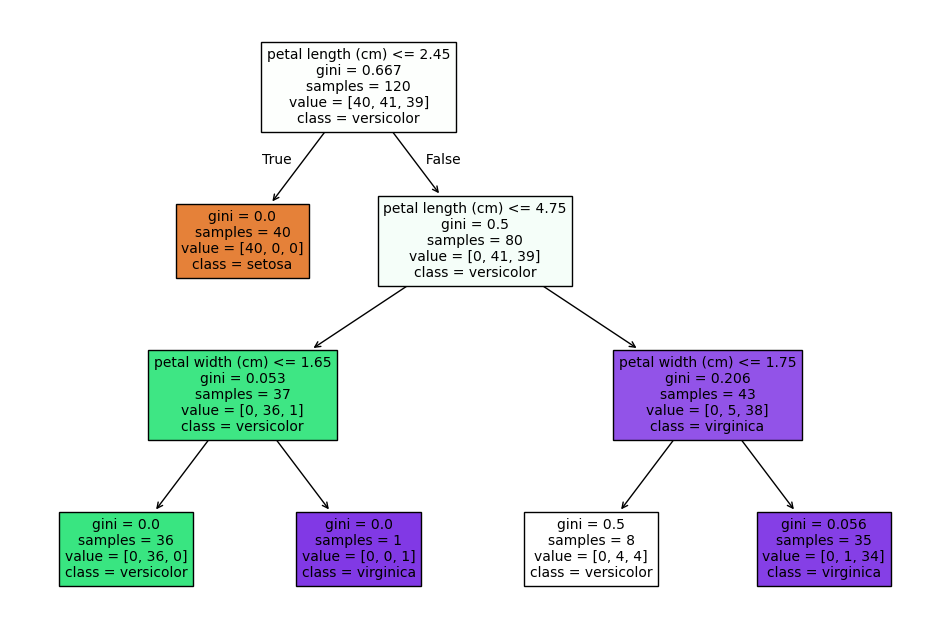

In [6]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, fontsize=10, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

**Predicting X_test values:**

In [7]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Evaluating Model Performance:**

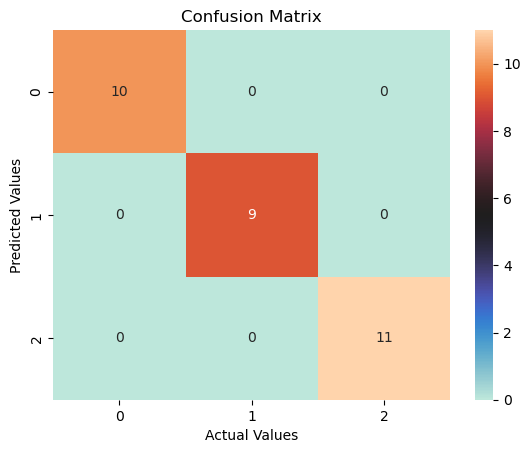

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='icefire')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [9]:
cr = classification_report(y_test, y_pred)
print("Classification Report: \n ", cr)

Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Exporting the model:**

In [10]:
import pickle

with open('iris_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)